In [20]:
import tellurium as te; te.setDefaultPlottingEngine('matplotlib')
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
model = '''
#functions



X=1;
Z=0;
Y=0;
Sx=0;
Sy=1;
By=0;
Bz= 0;
by=1;
bz=1;
ay =1;
az = 1;


X1 := Sx*X
Y1 := Sy*Y

H=2;
Kxy=0.1;
Kyz= 0.5;
Kxz=0.1;



#ODE

Y'= By + by * (X1/Kxy)^H  /  (1+(X1/Kxy)^H) - ay * Y 
Z'= Bz + bz * ((X1/Kxz)^H * (Y1/Kyz)^H) /  ((1+(X1/Kxz)^H) * (1+(Y1/Kyz)^H)) - az * Z 


E1: at (time>0): Sx= 0;
E2: at (time>1): Sx=1;
E3: at (time>4): Sx=0;

'''


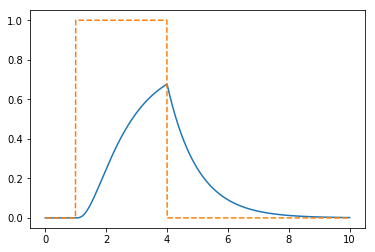

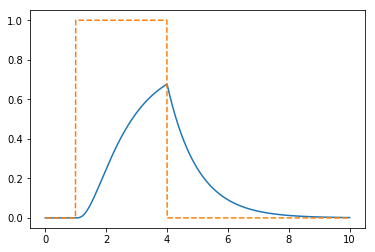

In [60]:
start = 0
end = 10
steps = 1000

r=te.loada(model)
plt.figure(1)
r.timeCourseSelections=['time', 'X', 'Y', 'Z', 'Sx', 'Sy']
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'])

plt.plot(res['time'], res['Sx'],'--')


plt.figure(2)
r.resetAll()
#r['test']=500;
res = r.simulate(start, end, steps)
plt.plot(res['time'], res['Z'])

plt.plot(res['time'], res['Sx'],'--')

In [22]:
res

         time, X,           Y,           Z, Sx, Sy
 [[         0, 1,           0,           0,  0,  1],
  [   0.01001, 1,           0,           0,  0,  1],
  [   0.02002, 1,           0,           0,  0,  1],
  [   0.03003, 1,           0,           0,  0,  1],
  [   0.04004, 1,           0,           0,  0,  1],
  [ 0.0500501, 1,           0,           0,  0,  1],
  [ 0.0600601, 1,           0,           0,  0,  1],
  [ 0.0700701, 1,           0,           0,  0,  1],
  [ 0.0800801, 1,           0,           0,  0,  1],
  [ 0.0900901, 1,           0,           0,  0,  1],
  [    0.1001, 1,           0,           0,  0,  1],
  [   0.11011, 1,           0,           0,  0,  1],
  [   0.12012, 1,           0,           0,  0,  1],
  [   0.13013, 1,           0,           0,  0,  1],
  [   0.14014, 1,           0,           0,  0,  1],
  [   0.15015, 1,           0,           0,  0,  1],
  [   0.16016, 1,           0,           0,  0,  1],
  [   0.17017, 1,           0,           0,  0, 